In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.8.0


In [2]:
import numpy
from tqdm import tqdm

size = 1000000

data = numpy.random.normal(0,0.1,size)
data.sort()


In [ ]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(data, 50, density=True)
plt.plot(bins, 1/(0.1 * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - 0)**2 / (2 * 0.1**2) ),
         linewidth=2, color='r')
plt.show()

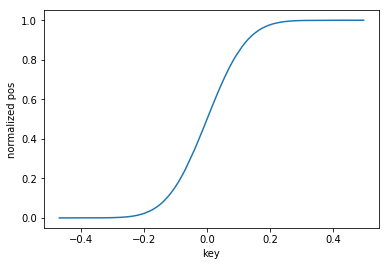

In [4]:
key = data
pos = range(len(data))
pos = [p/size for p in pos]

plt.plot(key,pos)
plt.xlabel('key')
plt.ylabel('normalized pos')
plt.show()

In [5]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(50, activation=tf.nn.relu, 
                       input_shape=(1,)),
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)
#  optimizer = keras.optimizers.SGD(lr=0.001, decay=0.1, momentum=0.1, nesterov=False)
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


In [6]:
import random
data = list(zip(key,pos))
random.shuffle(data)
key_s, pos_s = zip(*data)
key_s = list(key_s)
pos_s = list(pos_s)

In [7]:
import time
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 10

tic = time.time()
# Store training stats
history = model.fit(key, pos, epochs=EPOCHS, validation_split=0.0, verbose=0, callbacks=[PrintDot()])
#history = model.fit(key_s, pos_s, epochs=EPOCHS, batch_size=1000000, verbose=0, validation_split=0, callbacks=[PrintDot()])
print('finish in', time.time()-tic, 'sec, totally:', EPOCHS*size)


..........finish in 345.60868859291077 sec, totally: 10000000


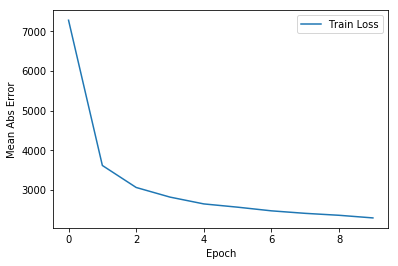

In [8]:

import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(history.epoch, size*np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
  #plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
  #         label = 'Val loss')
  plt.legend()

plot_history(history)




pos set Mean Abs Error: $1227.98


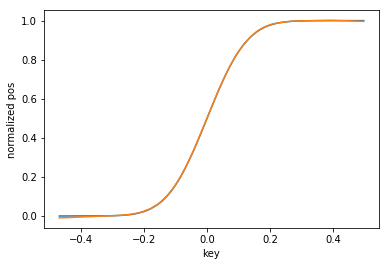

In [9]:
[loss, mae] = model.evaluate(key, pos, verbose=0)

print("pos set Mean Abs Error: ${:7.2f}".format(mae * size))
tic = time.time()
pos_predictions = model.predict(key).flatten()
toc = time.time() - tic
plt.plot(key,pos)
plt.plot(key,pos_predictions)

plt.xlabel('key')
plt.ylabel('normalized pos')
plt.show()



In [11]:
diff = abs(numpy.array(pos)-numpy.array(pos_predictions))
print('max diff',max(diff)*size)
print('avg diff',diff.mean()*size)
print('avg search time', toc/size, 'sec')

max diff 9818.37511062622
avg diff 1227.9783582424175
avg search time 1.28792724609375e-05 sec
